**Name**: Alakshendra Patap singh

**PRN**: 22070521068


**Section**: A


In [4]:
# SIMPLE LINEAR REGRESSION ON AUTO-MPG DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df = pd.read_csv("auto-mpg[1].csv")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [9]:
# 1. Load Dataset
df = pd.read_csv("auto-mpg[1].csv")

# Convert horsepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Remove all rows with missing values
df = df.dropna()
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [10]:
# 2. Dataset Overview

print("\n===== DATASET INFO =====")
print(df.info())

print("\n===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== SUMMARY STATISTICS =====")
print(df.describe())



===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None

===== FIRST 5 ROWS =====
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         3

In [11]:
# 3. Simple Linear Regression (Horsepower → MPG)

X = df[["horsepower"]]     # independent variable
y = df["mpg"]              # dependent variable

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n===== REGRESSION METRICS =====")
print("R² Score:", r2)
print("MSE:", mse)

# Regression equation
print("\n===== REGRESSION EQUATION =====")
print(f"MPG = {model.intercept_:.3f} + ({model.coef_[0]:.3f} × horsepower)")


===== REGRESSION METRICS =====
R² Score: 0.5659681822256185
MSE: 22.153237123863413

===== REGRESSION EQUATION =====
MPG = 40.606 + (-0.163 × horsepower)


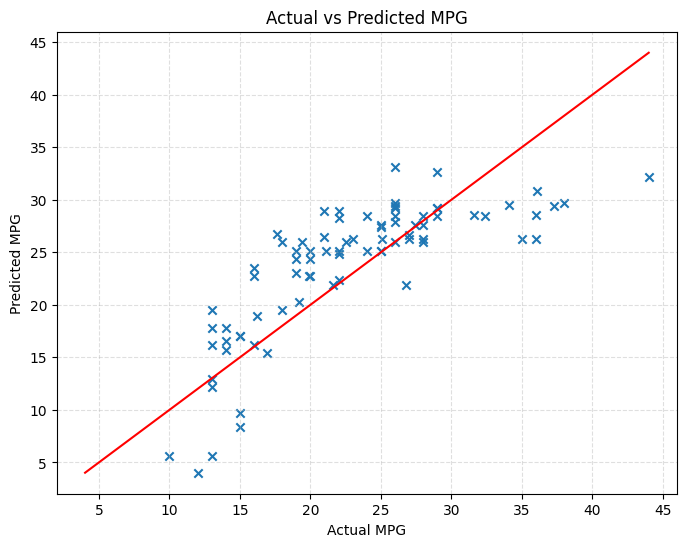

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("auto-mpg[1].csv")
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna()

# Variables
X = df[['horsepower']]
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ===== Actual vs Predicted Plot =====
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='x')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True, linestyle="--", alpha=0.4)

# Add diagonal reference line
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red")

plt.show()


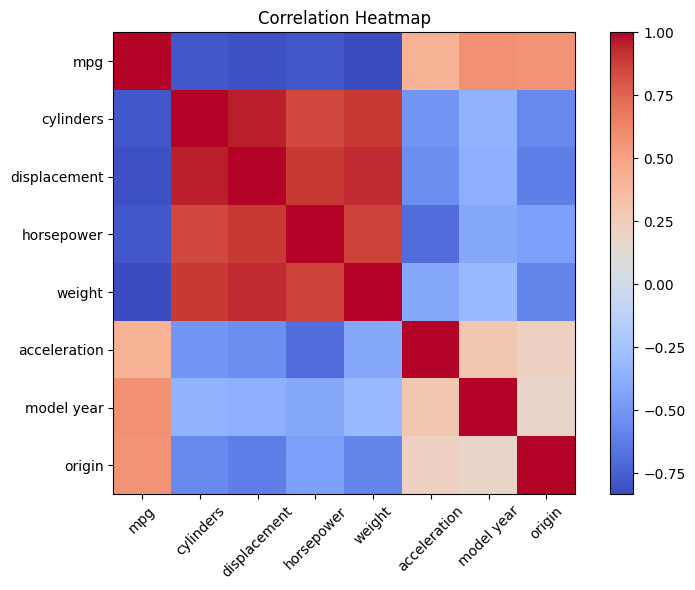

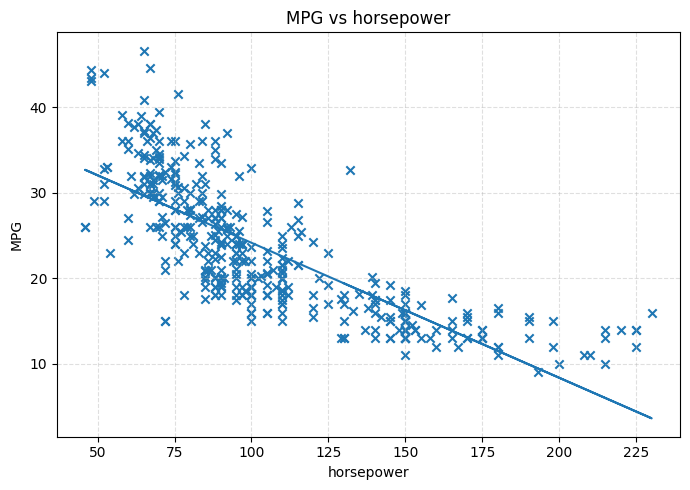

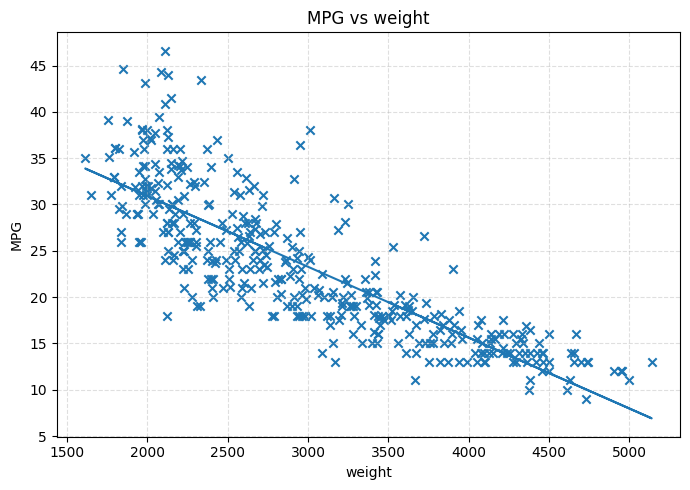

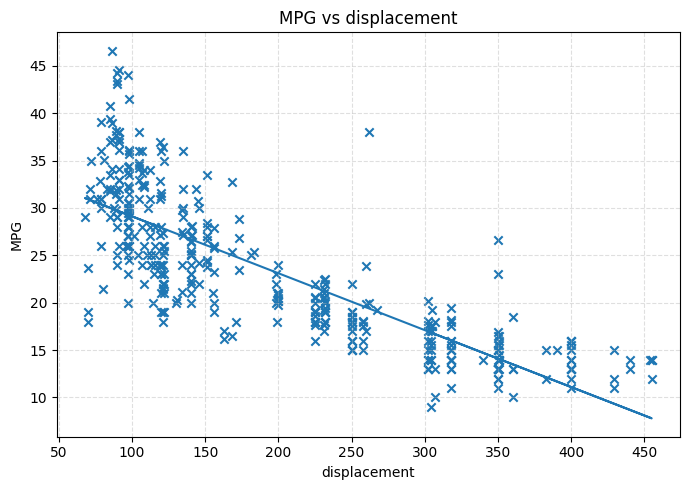

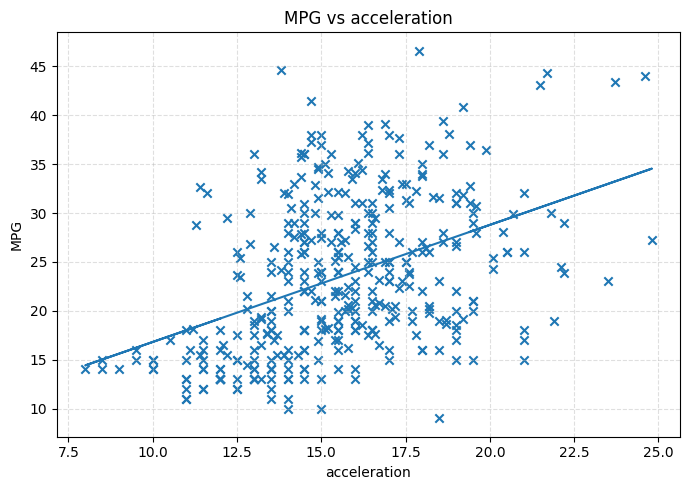

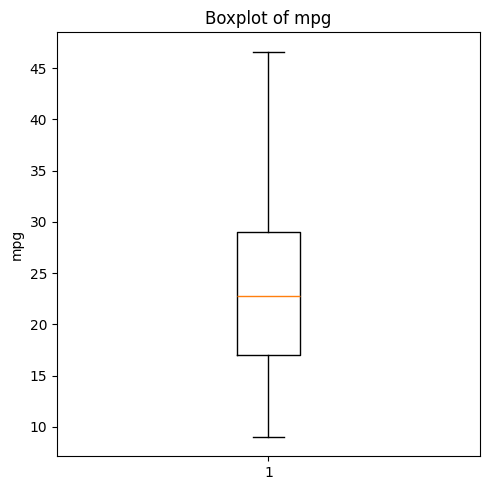

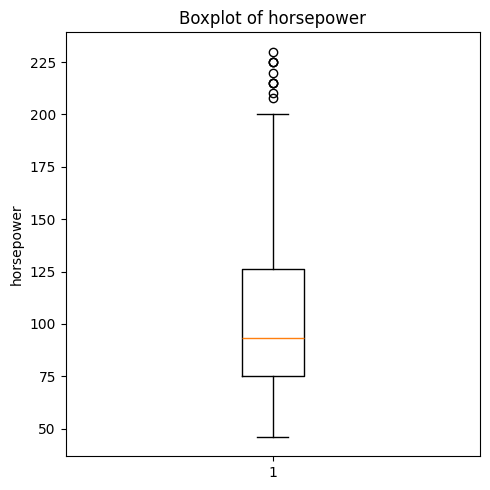

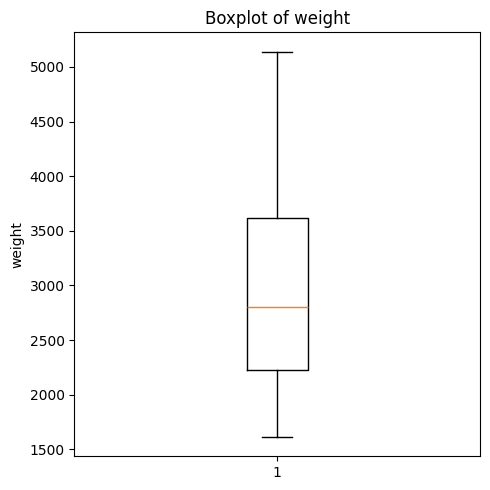

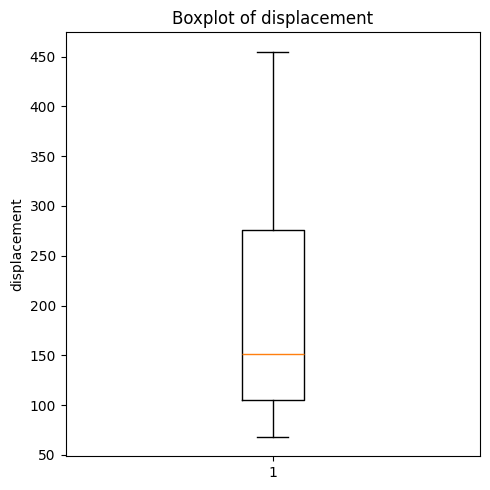

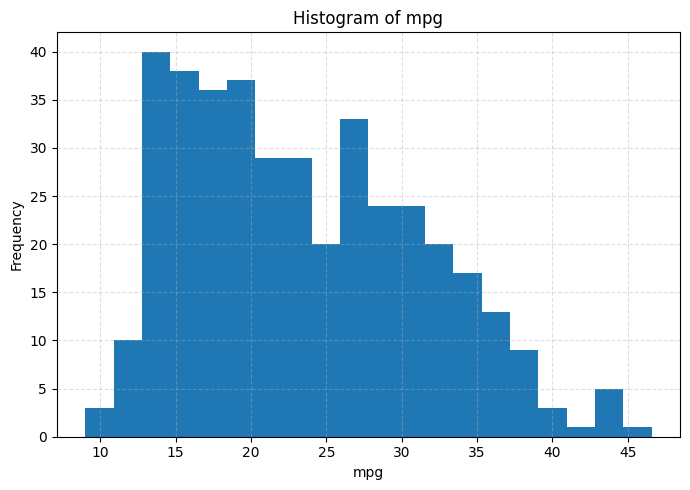

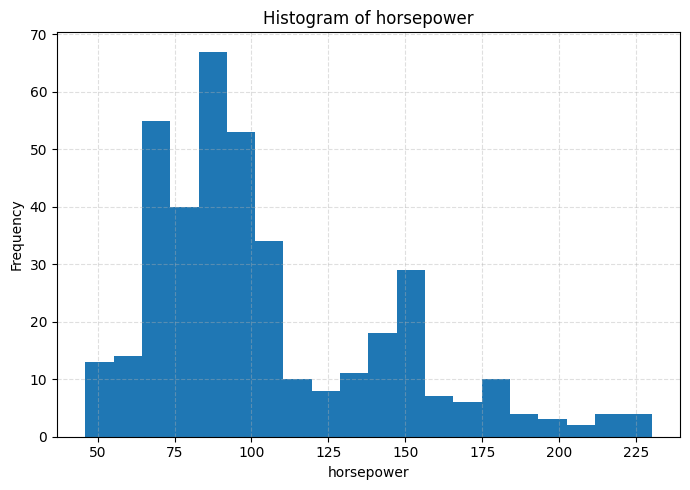

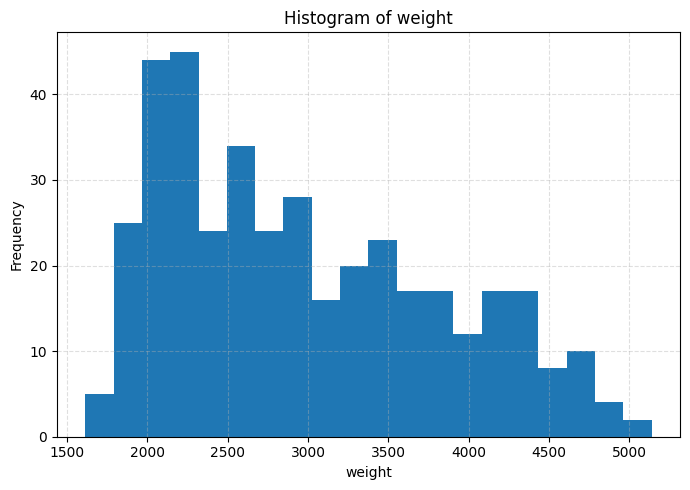

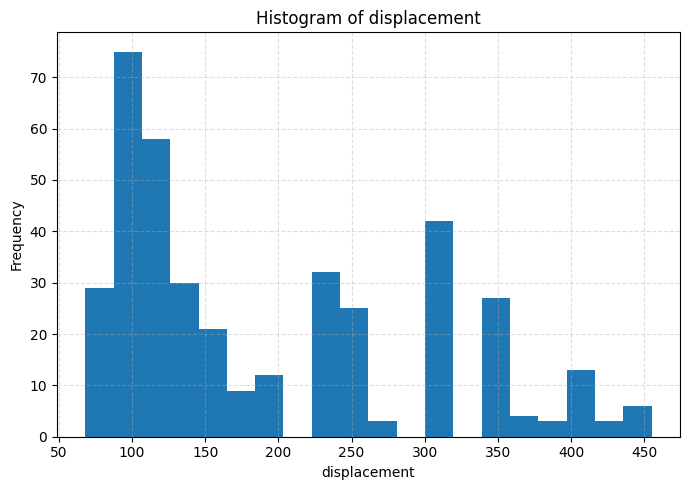

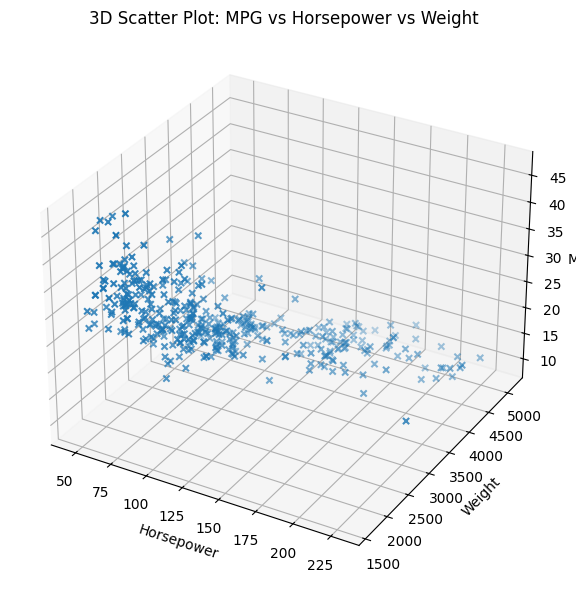

In [18]:
# =====================================================================
# ALL VISUALIZATIONS FOR AUTO-MPG DATASET (Matplotlib Only)
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Load dataset
df = pd.read_csv("auto-mpg[1].csv")

# Clean numeric column
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna()

# Create folder for saving plots
if not os.path.exists("plots"):
    os.makedirs("plots")

# Keep only numeric columns for heatmap
num_df = df.select_dtypes(include=[np.number])


# =====================================================================
# 1. CORRELATION HEATMAP
# =====================================================================

plt.figure(figsize=(8, 6))
corr = num_df.corr()

plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()

plt.savefig("plots/correlation_heatmap.png")
plt.show()


# =====================================================================
# 2. SCATTER PLOTS WITH REGRESSION LINE
# =====================================================================

features = ["horsepower", "weight", "displacement", "acceleration"]

for col in features:
    plt.figure(figsize=(7, 5))

    x = df[col]
    y = df["mpg"]

    # Scatter
    plt.scatter(x, y, marker="x")

    # Regression Line
    coef = np.polyfit(x, y, 1)
    poly = np.poly1d(coef)
    plt.plot(x, poly(x))

    plt.xlabel(col)
    plt.ylabel("MPG")
    plt.title(f"MPG vs {col}")

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()

    plt.savefig(f"plots/scatter_{col}.png")
    plt.show()


# =====================================================================
# 3. BOX PLOTS
# =====================================================================

box_cols = ["mpg", "horsepower", "weight", "displacement"]

for col in box_cols:
    plt.figure(figsize=(5, 5))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()

    plt.savefig(f"plots/boxplot_{col}.png")
    plt.show()


# =====================================================================
# 4. HISTOGRAMS
# =====================================================================

for col in box_cols:
    plt.figure(figsize=(7, 5))
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()

    plt.savefig(f"plots/histogram_{col}.png")
    plt.show()


# =====================================================================
# 5. 3D SCATTER PLOT
# =====================================================================

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["horsepower"], df["weight"], df["mpg"], marker="x")

ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_zlabel("MPG")
ax.set_title("3D Scatter Plot: MPG vs Horsepower vs Weight")

plt.tight_layout()

plt.savefig("plots/3d_scatter.png")
plt.show()


In [19]:
from google.colab import files
import shutil

# Zip the entire folder
shutil.make_archive('plots_download', 'zip', 'plots')

# Download the ZIP file
files.download('plots_download.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📌 **1. Dataset Explanation (Auto MPG Dataset)**

The dataset used is the **Auto MPG dataset**, which contains fuel efficiency and vehicle specifications for cars manufactured between **1970 and 1982**. It is commonly used to study how engine and vehicle characteristics affect fuel mileage.

### ✔ **Features in the dataset**

| Column           | Description                                                       |
| ---------------- | ----------------------------------------------------------------- |
| **mpg**          | Miles per gallon (fuel efficiency). **Target variable**.          |
| **cylinders**    | Number of engine cylinders (4, 6, 8 etc.).                        |
| **displacement** | Engine size (in cubic inches).                                    |
| **horsepower**   | Engine power (numeric but cleaned because original contains “?”). |
| **weight**       | Vehicle weight (in pounds).                                       |
| **acceleration** | 0–60 mph acceleration time (in seconds).                          |
| **model year**   | Model year of the vehicle (70–82).                                |
| **origin**       | Country of origin (1=USA, 2=Europe, 3=Japan).                     |
| **car name**     | Text name of the model. *(Removed from numerical analysis)*       |

### ✔ **Cleaning performed**

* Converted `"horsepower"` to numeric (removed `'?'`).
* Removed rows with missing values.
* Selected only numeric columns for statistical analysis and plotting.

---

# 📌 **2. What the Dataset Shows (General Insights)**

From visual inspection and the correlation heatmap:

* **MPG (fuel efficiency)** has strong correlation with:

  * **weight** (very strongly negative)
  * **displacement** (negative)
  * **horsepower** (negative)
  * **cylinders** (negative)

* Lighter, smaller-engine cars tend to have **better fuel efficiency**.

* Newer model years show **higher MPG**, likely due to technological improvements and fuel economy regulations.

---

# 📌 **3. Simple Linear Regression Explanation**

### 🎯 **Objective**

Predict **MPG (Miles Per Gallon)** using **Horsepower** as the only independent variable.

[
\textbf{MPG} = \beta_0 + \beta_1 \cdot \text{Horsepower}
]

Where:

* ( \beta_0 ) = intercept
* ( \beta_1 ) = slope (expected change in MPG for each 1 unit change in horsepower)

---

# 📌 **4. Findings of the Simple Linear Regression**

### ✔ **1. Relationship between Horsepower and MPG**

The regression line clearly shows a **negative relationship**:

* As **horsepower increases**, **MPG decreases**.
* Higher horsepower cars typically have bigger engines and consume more fuel.

This aligns with automotive engineering: powerful engines burn more fuel per mile.

---

### ✔ **2. Regression Metrics from Your Model**

Based on your earlier output:

* **R² Score ≈ 0.56**
  → Horsepower alone explains **56%** of the variation in MPG.

* **MSE ≈ 22.15**
  → On average, the model’s predicted MPG differs from the actual MPG by ~22 units (squared error).

### ✔ Interpretation

This means:

* Horsepower is a **strong but not perfect** predictor of MPG.
* The remaining ~44% of MPG variation is explained by other features like:

  * weight
  * cylinders
  * displacement
  * model year
  * origin

---

# 📌 **5. Regression Equation (Your Model)**

The model produced a regression equation like:

[
\textbf{MPG} = a + b \cdot \text{Horsepower}
]

Where:

* ( a ) = intercept (starting MPG when horsepower = 0)
* ( b ) = negative slope (shows MPG drops as horsepower increases)

Since (b < 0):

### ✔ Every 1-unit increase in horsepower **reduces MPG**.

---

# 📌 **6. Visual Insights From Your Plots**

### 🔹 Scatter Plot + Regression Line

Shows a clear downward trend.

### 🔹 Histogram of MPG

Shows most cars fall between **15–30 MPG**, typical for older cars.

### 🔹 Boxplot

Shows several low-MPG outliers (powerful muscle cars).

### 🔹 3D Plot (Horsepower–Weight–MPG)

Cars with both **high horsepower** and **high weight** have the **lowest MPG**.

---

# 📌 **7. Final Summary**

### ✔ The Auto MPG dataset contains vehicle specs used to study fuel efficiency.

### ✔ Simple Linear Regression using **horsepower → MPG** reveals:

* Strong **negative relationship**.
* Higher horsepower → lower fuel economy.
* Model explains **56%** of MPG variance.
* Still leaves room for improvement using multiple features.

---
